<h2><center>Matrices and Eigenvalues</center></h2>
<i>This notebook is an introduction to matrix operations in python and to practical computations of eigenvalues and eigenvectors.

Author: Gwendoline De Bie

<h3>1. Introduction to matrix operations</h3>

In this section, we quickly review the python implementation of the main matrix operations studied in the course, followed by two exercises.

<b>Step 1: Loading python packages</b>

In [5]:
import numpy as np
from numpy import linalg
import math
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'numpy'

<b>Step 2: Elementary matrix functions</b>

- Define matrix from elementwise entries:

In [3]:
A = np.array([[6,-1],[2,3]])
A

NameError: name 'np' is not defined

- Eigenvalues computation:

In [21]:
linalg.eigvals(A)

array([5., 4.])

- Eigenvalues and eigenvectors computation:

In [22]:
# v, p = linalg.eig(A) egval v  egvect p
v, p = linalg.eig(A)
print( "v=", v )
print( "p=", p )
print ("v0=", v[0])
print ("p0=", p[:,0])
print ("v1=", v[1])
print ("p1=", p[:,1])


v= [5. 4.]
p= [[0.70710678 0.4472136 ]
 [0.70710678 0.89442719]]
v0= 5.0
p0= [0.70710678 0.70710678]
v1= 4.0
p1= [0.4472136  0.89442719]


Check eigenvectors property ($Av=\lambda v$) is verified for each eigenvalue, eigenvector pair $(\lambda,v)$:

In [24]:
# np.dot produit matriciel 
# pour egval 5 et egvect p corresp
# [: , 0] means [first_row:last_row , column_0]

print( np.dot(A,p[:,0]) )

print( v[0]*p[:,0] )

[3.53553391 3.53553391]
[3.53553391 3.53553391]


In [25]:
# pour egval 5 et egvect p corresp
print( np.dot(A,p[:,1]) )
print( v[1]*p[:,1] )

[1.78885438 3.57770876]
[1.78885438 3.57770876]


- Diagonalisation computation:

In [27]:
#avec p les egvect de A P; npdiag(v) matrice D comprenant les egval de A; linalg.inv(p) matrice inverse de P
# a@b equivaut à np.dot(a,b); produit matriciel
p @ np.diag(v) @ linalg.inv(p)

array([[ 6., -1.],
       [ 2.,  3.]])

- Compute matrix powers using diagonalisation: let's calculate $A^{10}$

In [28]:
p @ np.diag(v**10) @ linalg.inv(p)

array([[18482674., -8717049.],
       [17434098., -7668473.]])

Check result using loop:

In [30]:
result = A.copy()
for _ in range(1,10):
    result = result @ A
print( result )

[[18482674 -8717049]
 [17434098 -7668473]]


- Compute square root using diagonalisation: let's find a matrix $B$ such that $B^2=A$

In [34]:
B = p @ np.diag( np.sqrt(v) ) @ linalg.inv(p)
print ("B", B)
C = p @ np.sqrt( np.diag(v) ) @ linalg.inv(p)
print ("C", C)

B [[ 2.47213595 -0.23606798]
 [ 0.47213595  1.76393202]]
C [[ 2.47213595 -0.23606798]
 [ 0.47213595  1.76393202]]


In [35]:
B @ B


array([[ 6., -1.],
       [ 2.,  3.]])

- It gets tricky when size increases:

In [12]:
#%%timeit
#linalg.eig( np.random.random((5000,5000)) )

Hence a need for approximate computations.

<b> Exercise 1: </b> Define a function returning the $n$-th root of a matrix, using diagonalisation.

In [36]:
def nth_root(A,n):
    v, p = linalg.eig(A)
    return p @ np.diag( v**(1/n) ) @ linalg.inv(p)

In [37]:
nth_root(A,2)

array([[ 2.47213595, -0.23606798],
       [ 0.47213595,  1.76393202]])

In [40]:
C = nth_root(A,3)
C.dot(C).dot(C)
# C @ C @ C

array([[ 6., -1.],
       [ 2.,  3.]])

<b>Exercise 2:</b> Eigenvalue stability: if two real matrices $M$ and $N$ are almost equal, are the eigenvalues of $M$ and $N$ almost equal ?

In [41]:
M = np.array([[1,1000],[0,1]])
N = np.array([[1,1000],[-0.001,1]])
linalg.eigvals(M), linalg.eigvals(N)

(array([1., 1.]), array([1.+1.j, 1.-1.j]))

In this example, $M$ has 1 as only eigenvalue and $N$ has no real eigenvalue; $N$ has however two complex eigenvalues: 1+$i$ and 1-$i$.

<h3>2. Diagonalisation for population dynamics</h3>

In this section, we look into how diagonalization can help computations with an example of population dynamics. We consider the dynamics of a squirrel population. Each year (indexed by $t$), squirrels can be partitioned into three age groups:
- newborns, with count $P_0(t)$
- adults, with count $P_1(t)$
- elderly squirrels, with count $P_2(t)$

Any squirrel that survived to the end of the year moves to the next age group. Each age is characterized by its reproduction and survival properties:
- newborns: they are too young to reproduce; 80% of them survive to the next state
- adults: they produce a an average of 1.5 squirrel each year; 30% of them survive to the next state
- elderly squirrels: they produce an average of 0.7 squirrel each year. 

At any given year, the total population can be represented as vector $P(t) = \begin{pmatrix} P_0(t) \\ P_1(t) \\ P_2(t) \end{pmatrix}$, with initial population $P(0) = \begin{pmatrix} 5 \\ 10 \\7 \end{pmatrix}$.

<b>Exercise:</b><i> What is the long-term behavior of the squirrel population ?</i>

The population dynamics is characterized by the following system:

$\begin{pmatrix} P_0(t+1) \\ P_1(t+1) \\ P_2(t+1) \end{pmatrix} = \begin{pmatrix} 0 & 1.5 & 0.7 \\ 0.8 & 0 & 0 \\ 0 & 0.3 & 0 \end{pmatrix} \begin{pmatrix} P_0(t) \\ P_1(t) \\ P_2(t) \end{pmatrix} $, hence $\begin{pmatrix} P_0(t+k) \\ P_1(t+k) \\ P_2(t+k) \end{pmatrix} = \begin{pmatrix} 0 & 1.5 & 0.7 \\ 0.8 & 0 & 0 \\ 0 & 0.3 & 0 \end{pmatrix}^k \begin{pmatrix} P_0(t) \\ P_1(t) \\ P_2(t) \end{pmatrix}$

In [40]:

M = np.array([[0,1.5,0.7],[0.8,0,0],[0,0.3,0]])
M

print (M**10)

[[0.00000000e+00 5.76650391e+01 2.82475249e-02]
 [1.07374182e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.90490000e-06 0.00000000e+00]]


In [41]:
P0 = np.array([5,10,7])
print (np.dot(M**10, P0))

[5.76848123e+02 5.36870912e-01 5.90490000e-05]


The following function returns the population counts after $k$ years:

In [42]:
def dynamics(M,P0,k):
    v, p = linalg.eig(M)
    Mk = p @ np.diag(v**k) @ linalg.inv(p)
    print( "v=",v )
    print( "p=",p )
    
    print( v**k )
    return np.dot(Mk,P0)

In [43]:
dynamics(M,P0,10)

v= [ 1.15968403 -1.0172774  -0.14240663]
p= [[-0.8144008   0.77330696  0.0761134 ]
 [-0.56180876 -0.60813851 -0.42758344]
 [-0.14533496  0.17934297  0.90076587]]
[4.39943353e+00 1.18684487e+00 3.43006304e-09]


array([41.43136712, 40.51239322,  6.96161434])

The following function returns all population counts until year $k$:

In [44]:
# append ajoute liste en parentheses a liste avant .
def all_dynamics(M,P0,k):
    P = [P0]
    v, p = linalg.eig(M)
    for i in range(1,k+1):
        Mi = p @ np.diag(v**i) @ linalg.inv(p)
        P.append( np.dot(Mi,P0) )
    return np.array(P)

In [45]:
all_dynamics(M,P0,10)

array([[ 5.        , 10.        ,  7.        ],
       [19.9       ,  4.        ,  3.        ],
       [ 8.1       , 15.92      ,  1.2       ],
       [24.72      ,  6.48      ,  4.776     ],
       [13.0632    , 19.776     ,  1.944     ],
       [31.0248    , 10.45056   ,  5.9328    ],
       [19.8288    , 24.81984   ,  3.135168  ],
       [39.4243776 , 15.86304   ,  7.445952  ],
       [29.0067264 , 31.53950208,  4.758912  ],
       [50.64049152, 23.20538112,  9.46185062],
       [41.43136712, 40.51239322,  6.96161434]])

Graphically, long term population counts yield:

In [46]:
k_max = 50
result = all_dynamics(M,P0,k_max)

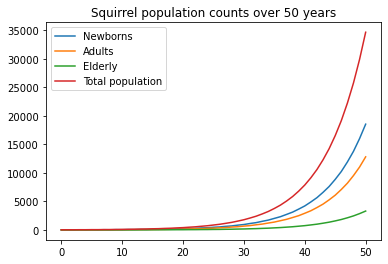

In [47]:
plt.plot(np.arange(0,k_max+1), result[:,0], label='Newborns')
plt.plot(np.arange(0,k_max+1), result[:,1], label='Adults')
plt.plot(np.arange(0,k_max+1), result[:,2], label='Elderly')
plt.plot(np.arange(0,k_max+1), np.sum(result,axis=1), label='Total population')
plt.legend()
plt.title('Squirrel population counts over '+str(k_max)+' years')
plt.show()

<h3>3. Approximate eigenvalue computations</h3>

As seen above, direct computations of eigenvalues for large matrix sizes may be difficult and time-consuming. In this section, we will look into methods to approximate eigenvalues, in particular the eigenvalue of largest module. Although this restriction may seem severe, eigenvalues of largest module are of great interest in many physical applications, as well as in the analysis of numerical methods.

<b> Step 1: Power iteration</b>

The power method is an iterative technique for computing the <i>eigenvalue of largest module</i> of a diagonalizable matrix $A \in \mathcal{M}_n(\mathbb{R})$ and corresponding eigenvector (also called <i>dominant</i> eigenvalue-eigenvector pair), as long as the eigenvalues of $A$ are ordered as
$$ \lvert \lambda_1 \rvert > \lvert \lambda_2 \rvert \geq \lvert \lambda_3 \rvert ... \geq \lvert \lambda_n \rvert $$
with $\lvert\lambda_2\rvert,...,\lvert\lambda_n\rvert\neq\lvert\lambda_1\rvert$.

The algorithm is the following:
- Start: choose a nonzero initial vector $v_0$
- Iterate: for $k=1,2,...$ until convergence, compute
$$v_k = \frac{1}{\alpha_k}Av_{k-1}$$
where $\alpha_k$ is the component of the vector $Av_{k-1}$ with maximum modulus (also called infinity norm).
- Return: the eigenvalue corresponding to $v_k$ is $\lambda = \frac{A v_k \cdot v_k}{v_k \cdot v_k}$ (also called Rayleigh quotient).

<b>Exercise: </b> <i>Implement the power method. How fast does it seem to converge ? Point out some failure cases.</i>

The following function implements power iteration. What are the parameters $v_0, error, lambd, mu, k, K$ ?

In [48]:
def poweriteration(A,v0,tol):
    error = math.inf # relative error of consecutive lambda values
    u = v0 # store previous eigenvector
    v = u/linalg.norm(u,math.inf) # eigenvector estimate
    mu = 1 # store previous lambda
    k = 0 # count iterations
    K = 1000 # maximum iteration number
    while error > tol and k <= K:
        k = k+1
        u = A.dot(v)
        lambd = u.dot(v)/v.dot(v)
        v = u/linalg.norm(u,math.inf)
        error = abs((lambd-mu)/mu)
        mu = lambd
    if k <= K:
        print(str(k)+" steps performed")
        print("Largest eigenvalue: "+str(lambd))
        print("Eigenvector: "+str(v))
    else:
        print("Power method does not converge in "+str(K)+" steps")
    return lambd, v

Parameters:
- $lambd$ stores the largest eigenvalue of $A$ (also denoted lambda)
- $error$ stores the relative error between two consecutive values of lambda; 
- $u$ stores the eigenvector corresponding to lambda, computed at the previous step; 
- $v_0$ is the initialization value of the eigenvector;
- $mu$ stores the value of lambda computed at the previous step;
- $k$ stores the count of iterations;
- $K$ is the maximal iterations number.

Testing on running 2-by-2 example:

In [49]:
v0 = np.random.rand(2)
tol = 1e-6
poweriteration(A, v0 ,tol)

ValueError: shapes (3,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

Testing on 4-by-4 example:

In [27]:
P = np.random.rand(4,4)
M = linalg.inv(P).dot(np.diag((-7,3,4,1))).dot(P)
v0 = np.random.rand(M.shape[0])
tol = 1e-6
poweriteration(M,v0,tol)

26 steps performed
Largest eigenvalue: -6.999997898252716
Eigenvector: [-0.91127282 -0.15711505  0.42141989  1.        ]


(-6.999997898252716,
 array([-0.91127282, -0.15711505,  0.42141989,  1.        ]))

Testing when non-diagonalizable: there is no guarantee for the power method to converge.

In [28]:
M = np.array([[1,-3],[0,1]])
v0 = np.random.rand(M.shape[0])
tol = 1e-6
poweriteration(M,v0,tol)

Power method does not converge in 1000 steps


(1.001000044381353, array([-1.00000000e+00,  3.33015134e-04]))

Testing when non-unique dominant eigenvalue: convergence of the power method depends on the sign of dominant eigenvalues.

In [29]:
P = np.random.rand(4,4)
M = linalg.inv(P).dot(np.diag((-7,7,4,1))).dot(P)
v0 = np.random.rand(M.shape[0])
tol = 1e-6
poweriteration(M,v0,tol)

Power method does not converge in 1000 steps


(-14.362250696846687,
 array([ 0.19993015,  0.41618194, -1.        ,  0.36461035]))

In [30]:
P = np.random.rand(4,4)
M = linalg.inv(P).dot(np.diag((-7,-7,4,1))).dot(P)
v0 = np.random.rand(M.shape[0])
tol = 1e-6
poweriteration(M,v0,tol)

26 steps performed
Largest eigenvalue: -6.999998009645206
Eigenvector: [ 1.         -0.41311081 -0.16815668 -0.62937436]


(-6.999998009645206,
 array([ 1.        , -0.41311081, -0.16815668, -0.62937436]))

Adding convergence plots:

In [31]:
def poweriteration_plots(A,v0,tol):
    error = math.inf # relative error of consecutive lambda values
    u = v0 # store previous eigenvector
    v = u/linalg.norm(u,math.inf) # eigenvector estimate
    mu = 1 # store previous lambda
    k = 0 # count iterations
    K = 1000 # maximum iteration number
    errors = []
    while error > tol and k <= K:
        k = k+1
        u = A.dot(v)
        lambd = u.dot(v)/v.dot(v)
        v = u/linalg.norm(u,math.inf)
        error = abs((lambd-mu)/mu)
        errors.append(error)
        mu = lambd
    if k <= K:
        print(str(k)+" steps performed")
        print("Largest eigenvalue: "+str(lambd))
        print("Eigenvector: "+str(v))
    else:
        print("Power method does not converge in "+str(K)+" steps")
    return lambd, v, errors

In [32]:
v0 = np.random.rand(2)
tol = 1e-6
lambd, v, errors = poweriteration_plots(A,v0,tol)

44 steps performed
Largest eigenvalue: 4.999982738658493
Eigenvector: [0.99999079 1.        ]


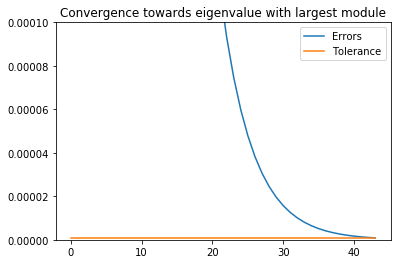

In [33]:
plt.plot(np.arange(0,len(errors)), errors, label='Errors')
plt.plot(np.arange(0,len(errors)), tol*np.ones(len(errors)), label='Tolerance')
plt.ylim(0,1e-4)
plt.legend()
plt.title('Convergence towards eigenvalue with largest module')
plt.show()

How does the number of iterations required vary when the second largest eigenvalue varies?

In [34]:
step_nb = []
for second_eig in np.arange(-6.9,6.9,0.5):
    P = np.random.rand(4,4)
    M = linalg.inv(P).dot(np.diag((-7,second_eig,0,0))).dot(P)
    v0 = np.random.rand(M.shape[0])
    tol = 1e-6
    lambd, v, errors = poweriteration_plots(M,v0,tol)
    step_nb.append( len(errors) )

483 steps performed
Largest eigenvalue: -6.9995234431949
Eigenvector: [-1.          0.29813829  0.39911187 -0.37589716]
114 steps performed
Largest eigenvalue: -7.000069209656208
Eigenvector: [-1.          0.05628278 -0.1969384   0.52435413]
58 steps performed
Largest eigenvalue: -7.000035748928606
Eigenvector: [ 0.52277625 -0.38977949 -0.82790994  1.        ]
37 steps performed
Largest eigenvalue: -7.00002294766684
Eigenvector: [ 0.08382126 -1.          0.25789038  0.64792112]
35 steps performed
Largest eigenvalue: -7.000013677015506
Eigenvector: [ 0.22815872 -0.86853424 -0.28802419  1.        ]
25 steps performed
Largest eigenvalue: -7.000010145176019
Eigenvector: [ 0.06226727  1.          0.0299047  -0.76022848]
22 steps performed
Largest eigenvalue: -6.999994849531876
Eigenvector: [-0.75435204 -0.07149748 -0.04959147  1.        ]
19 steps performed
Largest eigenvalue: -7.00000540916547
Eigenvector: [-0.01804896  0.15993486 -1.          0.59248918]
14 steps performed
Largest eigenva

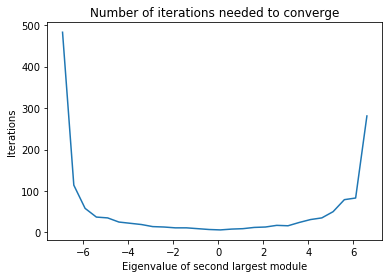

In [35]:
plt.plot(np.arange(-6.9,6.9,0.5), step_nb)
plt.xlabel("Eigenvalue of second largest module")
plt.ylabel("Iterations")
plt.title('Number of iterations needed to converge')
plt.show()

<b> References </b>

Prince, T. and Angulo, N., "Application of Eigenvalues and Eigenvectors and Diagonalization to Environmental Science", Applied Ecology and Environmental Sciences 2(4):106-109, 2014

Larson, R. and Edwards, B. H. and Falvo, D. C., "Elementary Linear Algebra", Fifth edition, Houghton Mifflin Company, 2004